# Language Translation
In this project, you’re going to take a peek into the realm of neural network machine translation.  You’ll be training a sequence to sequence model on a dataset of English and French sentences that can translate new sentences from English to French.
## Get the Data
Since translating the whole language of English to French will take lots of time to train, we have provided you with a small portion of the English corpus.

In [1]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper
import problem_unittests as tests

source_path = 'data/small_vocab_en'
target_path = 'data/small_vocab_fr'
source_text = helper.load_data(source_path)
target_text = helper.load_data(target_path)

## Explore the Data
Play around with view_sentence_range to view different parts of the data.

In [2]:
view_sentence_range = (0, 10)

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

print('Dataset Stats')
print('Roughly the number of unique words: {}'.format(len({word: None for word in source_text.split()})))

sentences = source_text.split('\n')
word_counts = [len(sentence.split()) for sentence in sentences]
print('Number of sentences: {}'.format(len(sentences)))
print('Average number of words in a sentence: {}'.format(np.average(word_counts)))

print()
print('English sentences {} to {}:'.format(*view_sentence_range))
print('\n'.join(source_text.split('\n')[view_sentence_range[0]:view_sentence_range[1]]))
print()
print('French sentences {} to {}:'.format(*view_sentence_range))
print('\n'.join(target_text.split('\n')[view_sentence_range[0]:view_sentence_range[1]]))

Dataset Stats
Roughly the number of unique words: 227
Number of sentences: 137861
Average number of words in a sentence: 13.225277634719028

English sentences 0 to 10:
new jersey is sometimes quiet during autumn , and it is snowy in april .
the united states is usually chilly during july , and it is usually freezing in november .
california is usually quiet during march , and it is usually hot in june .
the united states is sometimes mild during june , and it is cold in september .
your least liked fruit is the grape , but my least liked is the apple .
his favorite fruit is the orange , but my favorite is the grape .
paris is relaxing during december , but it is usually chilly in july .
new jersey is busy during spring , and it is never hot in march .
our least liked fruit is the lemon , but my least liked is the grape .
the united states is sometimes busy during january , and it is sometimes warm in november .

French sentences 0 to 10:
new jersey est parfois calme pendant l' automne 

## Implement Preprocessing Function
### Text to Word Ids
As you did with other RNNs, you must turn the text into a number so the computer can understand it. In the function `text_to_ids()`, you'll turn `source_text` and `target_text` from words to ids.  However, you need to add the `<EOS>` word id at the end of each sentence from `target_text`.  This will help the neural network predict when the sentence should end.

You can get the `<EOS>` word id by doing:
```python
target_vocab_to_int['<EOS>']
```
You can get other word ids using `source_vocab_to_int` and `target_vocab_to_int`.

In [3]:
def text_to_ids(source_text, target_text, source_vocab_to_int, target_vocab_to_int):
    """
    Convert source and target text to proper word ids
    :param source_text: String that contains all the source text.
    :param target_text: String that contains all the target text.
    :param source_vocab_to_int: Dictionary to go from the source words to an id
    :param target_vocab_to_int: Dictionary to go from the target words to an id
    :return: A tuple of lists (source_id_text, target_id_text)
    """
    # Implement Function
#     source_id_text = []
#     for sentence in source_text.split('\n'):
#         source_sentence_id = [source_vocab_to_int[word] for word in sentence.split()]
#         source_id_text.append(source_sentence_id)
    
#     target_id_text = []
#     for sentence in target_text.split('\n'):
#         target_sentence_id = [target_vocab_to_int[word] for word in sentence.split()]
#         target_sentence_id.append(target_vocab_to_int['<EOS>'])
#         target_id_text.append(target_sentence_id)

    source_id_text = [[source_vocab_to_int[w] for w in sentence.split()] for sentence in source_text.split('\n')]
    target_id_text = [[target_vocab_to_int[w] for w in sentence.split()]+[target_vocab_to_int['<EOS>']] for sentence in target_text.split('\n')]   
    return source_id_text, target_id_text

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_text_to_ids(text_to_ids)

Tests Passed


### Preprocess all the data and save it
Running the code cell below will preprocess all the data and save it to file.

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
helper.preprocess_and_save_data(source_path, target_path, text_to_ids)

# Check Point
This is your first checkpoint. If you ever decide to come back to this notebook or have to restart the notebook, you can start from here. The preprocessed data has been saved to disk.

In [2]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np
import helper

(source_int_text, target_int_text), (source_vocab_to_int, target_vocab_to_int), _ = helper.load_preprocess()

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [5]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) in [LooseVersion('1.0.0'), LooseVersion('1.0.1')], 'This project requires TensorFlow version 1.0  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0


//anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: No GPU found. Please use a GPU to train your neural network.
  


## Build the Neural Network
You'll build the components necessary to build a Sequence-to-Sequence model by implementing the following functions below:
- `model_inputs`
- `process_decoding_input`
- `encoding_layer`
- `decoding_layer_train`
- `decoding_layer_infer`
- `decoding_layer`
- `seq2seq_model`

### Input
Implement the `model_inputs()` function to create TF Placeholders for the Neural Network. It should create the following placeholders:

- Input text placeholder named "input" using the TF Placeholder name parameter with rank 2.
- Targets placeholder with rank 2.
- Learning rate placeholder with rank 0.
- Keep probability placeholder named "keep_prob" using the TF Placeholder name parameter with rank 0.

Return the placeholders in the following the tuple (Input, Targets, Learing Rate, Keep Probability)

In [6]:
def model_inputs():
    """
    Create TF Placeholders for input, targets, and learning rate.
    :return: Tuple (input, targets, learning rate, keep probability)
    """
    # Implement Function
    Input = tf.placeholder(tf.int32, [None, None], name='input')
    Targets = tf.placeholder(tf.int32, [None, None])
    learning_rate = tf.placeholder(tf.float32)
    keep_prob = tf.placeholder(tf.float32, name='keep_prob')
    
    return Input, Targets, learning_rate, keep_prob

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Process Decoding Input
Implement `process_decoding_input` using TensorFlow to remove the last word id from each batch in `target_data` and concat the GO ID to the beginning of each batch.

In [7]:
def process_decoding_input(target_data, target_vocab_to_int, batch_size):
    """
    Preprocess target data for dencoding
    :param target_data: Target Placehoder
    :param target_vocab_to_int: Dictionary to go from the target words to an id
    :param batch_size: Batch Size
    :return: Preprocessed target data
    """
    # Implement Function
    start = tf.fill([batch_size, 1], target_vocab_to_int['<GO>'])
    end = tf.strided_slice(target_data, [0,0], [batch_size,-1], [1,1])
    decoding_input = tf.concat([start, end], axis=1)

    return decoding_input

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_process_decoding_input(process_decoding_input)

Tests Passed


### Encoding
Implement `encoding_layer()` to create a Encoder RNN layer using [`tf.nn.dynamic_rnn()`](https://www.tensorflow.org/api_docs/python/tf/nn/dynamic_rnn).

In [8]:
def encoding_layer(rnn_inputs, rnn_size, num_layers, keep_prob):
    """
    Create encoding layer
    :param rnn_inputs: Inputs for the RNN
    :param rnn_size: RNN Size
    :param num_layers: Number of layers
    :param keep_prob: Dropout keep probability
    :return: RNN state
    """
    # Implement Function
    lstm = tf.contrib.rnn.BasicLSTMCell(rnn_size)
    drop = tf.contrib.rnn.DropoutWrapper(lstm, output_keep_prob=keep_prob)
    cell = tf.contrib.rnn.MultiRNNCell([drop]*num_layers)
    outputs, encoder_state = tf.nn.dynamic_rnn(cell, rnn_inputs, dtype=tf.float32)
    
    return encoder_state

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_encoding_layer(encoding_layer)

Tests Passed


### Decoding - Training
Create training logits using [`tf.contrib.seq2seq.simple_decoder_fn_train()`](https://www.tensorflow.org/versions/r1.0/api_docs/python/tf/contrib/seq2seq/simple_decoder_fn_train) and [`tf.contrib.seq2seq.dynamic_rnn_decoder()`](https://www.tensorflow.org/versions/r1.0/api_docs/python/tf/contrib/seq2seq/dynamic_rnn_decoder).  Apply the `output_fn` to the [`tf.contrib.seq2seq.dynamic_rnn_decoder()`](https://www.tensorflow.org/versions/r1.0/api_docs/python/tf/contrib/seq2seq/dynamic_rnn_decoder) outputs.

In [12]:
def decoding_layer_train(encoder_state, dec_cell, dec_embed_input, sequence_length, decoding_scope,
                         output_fn, keep_prob):
    """
    Create a decoding layer for training
    :param encoder_state: Encoder State
    :param dec_cell: Decoder RNN Cell
    :param dec_embed_input: Decoder embedded input
    :param sequence_length: Sequence Length
    :param decoding_scope: TenorFlow Variable Scope for decoding
    :param output_fn: Function to apply the output layer
    :param keep_prob: Dropout keep probability
    :return: Train Logits
    """
    # Implement Function
    dynamic_fn_train = tf.contrib.seq2seq.simple_decoder_fn_train(encoder_state)
    output_train, state_train, _ = tf.contrib.seq2seq.dynamic_rnn_decoder(
        cell=dec_cell,\
        decoder_fn=dynamic_fn_train,\
        inputs=dec_embed_input,\
        sequence_length=sequence_length,\
        scope=decoding_scope)
    output_train = tf.nn.dropout(output_train, keep_prob)
    train_logits = output_fn(output_train)
    
    return train_logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_decoding_layer_train(decoding_layer_train)

Tests Passed


### Decoding - Inference
Create inference logits using [`tf.contrib.seq2seq.simple_decoder_fn_inference()`](https://www.tensorflow.org/versions/r1.0/api_docs/python/tf/contrib/seq2seq/simple_decoder_fn_inference) and [`tf.contrib.seq2seq.dynamic_rnn_decoder()`](https://www.tensorflow.org/versions/r1.0/api_docs/python/tf/contrib/seq2seq/dynamic_rnn_decoder). 

In [13]:
def decoding_layer_infer(encoder_state, dec_cell, dec_embeddings, start_of_sequence_id, end_of_sequence_id,
                         maximum_length, vocab_size, decoding_scope, output_fn, keep_prob):
    """
    Create a decoding layer for inference
    :param encoder_state: Encoder state
    :param dec_cell: Decoder RNN Cell
    :param dec_embeddings: Decoder embeddings
    :param start_of_sequence_id: GO ID
    :param end_of_sequence_id: EOS Id
    :param maximum_length: The maximum allowed time steps to decode
    :param vocab_size: Size of vocabulary
    :param decoding_scope: TensorFlow Variable Scope for decoding
    :param output_fn: Function to apply the output layer
    :param keep_prob: Dropout keep probability
    :return: Inference Logits
    """
    # Implement Function
    dynamic_fn_inference = tf.contrib.seq2seq.simple_decoder_fn_inference(
        output_fn, encoder_state, \
        dec_embeddings, start_of_sequence_id, \
        end_of_sequence_id, maximum_length, vocab_size)
    logits_infer, state_infer, _ = tf.contrib.seq2seq.dynamic_rnn_decoder(
        cell=dec_cell, \
        decoder_fn=dynamic_fn_inference, \
        scope=decoding_scope)
    
    return logits_infer


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_decoding_layer_infer(decoding_layer_infer)

Tests Passed


### Build the Decoding Layer
Implement `decoding_layer()` to create a Decoder RNN layer.

- Create RNN cell for decoding using `rnn_size` and `num_layers`.
- Create the output fuction using [`lambda`](https://docs.python.org/3/tutorial/controlflow.html#lambda-expressions) to transform it's input, logits, to class logits.
- Use the your `decoding_layer_train(encoder_state, dec_cell, dec_embed_input, sequence_length, decoding_scope, output_fn, keep_prob)` function to get the training logits.
- Use your `decoding_layer_infer(encoder_state, dec_cell, dec_embeddings, start_of_sequence_id, end_of_sequence_id, maximum_length, vocab_size, decoding_scope, output_fn, keep_prob)` function to get the inference logits.

Note: You'll need to use [tf.variable_scope](https://www.tensorflow.org/api_docs/python/tf/variable_scope) to share variables between training and inference.

In [14]:
def decoding_layer(dec_embed_input, dec_embeddings, encoder_state, vocab_size, sequence_length, rnn_size,
                   num_layers, target_vocab_to_int, keep_prob):
    """
    Create decoding layer
    :param dec_embed_input: Decoder embedded input
    :param dec_embeddings: Decoder embeddings
    :param encoder_state: The encoded state
    :param vocab_size: Size of vocabulary
    :param sequence_length: Sequence Length
    :param rnn_size: RNN Size
    :param num_layers: Number of layers
    :param target_vocab_to_int: Dictionary to go from the target words to an id
    :param keep_prob: Dropout keep probability
    :return: Tuple of (Training Logits, Inference Logits)
    """
    # Implement Function
    lstm = tf.contrib.rnn.BasicLSTMCell(rnn_size)
    drop = tf.contrib.rnn.DropoutWrapper(lstm, output_keep_prob=keep_prob)
    dec_cell = tf.contrib.rnn.MultiRNNCell([drop]*num_layers)
    
    with tf.variable_scope("decoding") as decoding_scope:
        output_fn = lambda x: tf.contrib.layers.fully_connected(x, vocab_size, activation_fn=None, scope=decoding_scope)
        
        #decoding_scope.reuse_variables()
        training_logits = decoding_layer_train(encoder_state, dec_cell, dec_embed_input,\
                                               sequence_length, decoding_scope, output_fn, \
                                               keep_prob)
        decoding_scope.reuse_variables()
        infer_logits = decoding_layer_infer(encoder_state, dec_cell, dec_embeddings, \
                                            target_vocab_to_int['<GO>'], \
                                            target_vocab_to_int['<EOS>'], \
                                            sequence_length, \
                                            vocab_size, decoding_scope, \
                                            output_fn, keep_prob)
    
    return training_logits, infer_logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_decoding_layer(decoding_layer)

Tests Passed


### Build the Neural Network
Apply the functions you implemented above to:

- Apply embedding to the input data for the encoder.
- Encode the input using your `encoding_layer(rnn_inputs, rnn_size, num_layers, keep_prob)`.
- Process target data using your `process_decoding_input(target_data, target_vocab_to_int, batch_size)` function.
- Apply embedding to the target data for the decoder.
- Decode the encoded input using your `decoding_layer(dec_embed_input, dec_embeddings, encoder_state, vocab_size, sequence_length, rnn_size, num_layers, target_vocab_to_int, keep_prob)`.

In [15]:
def seq2seq_model(input_data, target_data, keep_prob, batch_size, sequence_length, source_vocab_size, target_vocab_size,
                  enc_embedding_size, dec_embedding_size, rnn_size, num_layers, target_vocab_to_int):
    """
    Build the Sequence-to-Sequence part of the neural network
    :param input_data: Input placeholder
    :param target_data: Target placeholder
    :param keep_prob: Dropout keep probability placeholder
    :param batch_size: Batch Size
    :param sequence_length: Sequence Length
    :param source_vocab_size: Source vocabulary size
    :param target_vocab_size: Target vocabulary size
    :param enc_embedding_size: Decoder embedding size
    :param dec_embedding_size: Encoder embedding size
    :param rnn_size: RNN Size
    :param num_layers: Number of layers
    :param target_vocab_to_int: Dictionary to go from the target words to an id
    :return: Tuple of (Training Logits, Inference Logits)
    """
    # Implement Function
    
    # Embedding to input data
    embedding_encoder = tf.Variable(tf.random_uniform((source_vocab_size, enc_embedding_size), -1, 1))
    enc_embed_input = tf.nn.embedding_lookup(embedding_encoder, input_data) #rnn_inputs
   
    # Encoder to input
    encoder_state = encoding_layer(enc_embed_input, rnn_size, num_layers, keep_prob)
    
    # Process target data
    decoding_input = process_decoding_input(target_data, target_vocab_to_int, batch_size)
    
    # Embedding to target data
    embedding_decoder = tf.Variable(tf.random_uniform((target_vocab_size, dec_embedding_size), -1, 1))
    dec_embed_input = tf.nn.embedding_lookup(embedding_decoder, decoding_input) 
    
    # Decode the encoded input
    training_logits, infer_logits = decoding_layer(dec_embed_input, embedding_decoder, encoder_state, \
                                                   target_vocab_size, sequence_length, rnn_size, num_layers, \
                                                   target_vocab_to_int, keep_prob)
    
    return training_logits, infer_logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_seq2seq_model(seq2seq_model)

Tests Passed


## Neural Network Training
### Hyperparameters
Tune the following parameters:

- Set `epochs` to the number of epochs.
- Set `batch_size` to the batch size.
- Set `rnn_size` to the size of the RNNs.
- Set `num_layers` to the number of layers.
- Set `encoding_embedding_size` to the size of the embedding for the encoder.
- Set `decoding_embedding_size` to the size of the embedding for the decoder.
- Set `learning_rate` to the learning rate.
- Set `keep_probability` to the Dropout keep probability

In [16]:
# Number of Epochs
epochs = 5
# Batch Size
batch_size = 256
# RNN Size
rnn_size = 256
# Number of Layers
num_layers = 3
# Embedding Size
encoding_embedding_size = 256
decoding_embedding_size = 256
# Learning Rate
learning_rate = 0.001
# Dropout Keep Probability
keep_probability = 0.7

### Build the Graph
Build the graph using the neural network you implemented.

In [17]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
save_path = 'checkpoints/dev'
(source_int_text, target_int_text), (source_vocab_to_int, target_vocab_to_int), _ = helper.load_preprocess()
max_source_sentence_length = max([len(sentence) for sentence in source_int_text])

train_graph = tf.Graph()
with train_graph.as_default():
    input_data, targets, lr, keep_prob = model_inputs()
    sequence_length = tf.placeholder_with_default(max_source_sentence_length, None, name='sequence_length')
    input_shape = tf.shape(input_data)
    
    train_logits, inference_logits = seq2seq_model(
        tf.reverse(input_data, [-1]), targets, keep_prob, batch_size, sequence_length, len(source_vocab_to_int), len(target_vocab_to_int),
        encoding_embedding_size, decoding_embedding_size, rnn_size, num_layers, target_vocab_to_int)

    tf.identity(inference_logits, 'logits')
    with tf.name_scope("optimization"):
        # Loss function
        cost = tf.contrib.seq2seq.sequence_loss(
            train_logits,
            targets,
            tf.ones([input_shape[0], sequence_length]))

        # Optimizer
        optimizer = tf.train.AdamOptimizer(lr)

        # Gradient Clipping
        gradients = optimizer.compute_gradients(cost)
        capped_gradients = [(tf.clip_by_value(grad, -1., 1.), var) for grad, var in gradients if grad is not None]
        train_op = optimizer.apply_gradients(capped_gradients)

### Train
Train the neural network on the preprocessed data. If you have a hard time getting a good loss, check the forms to see if anyone is having the same problem.

Epoch   0 Batch    0/538 - Train Accuracy:  0.267, Validation Accuracy:  0.344, Loss:  5.879
Epoch   0 Batch    1/538 - Train Accuracy:  0.266, Validation Accuracy:  0.346, Loss:  5.750
Epoch   0 Batch    2/538 - Train Accuracy:  0.282, Validation Accuracy:  0.343, Loss:  5.423
Epoch   0 Batch    3/538 - Train Accuracy:  0.247, Validation Accuracy:  0.331, Loss:  4.920
Epoch   0 Batch    4/538 - Train Accuracy:  0.264, Validation Accuracy:  0.343, Loss:  4.525
Epoch   0 Batch    5/538 - Train Accuracy:  0.315, Validation Accuracy:  0.364, Loss:  4.164
Epoch   0 Batch    6/538 - Train Accuracy:  0.340, Validation Accuracy:  0.376, Loss:  3.952
Epoch   0 Batch    7/538 - Train Accuracy:  0.323, Validation Accuracy:  0.385, Loss:  3.869
Epoch   0 Batch    8/538 - Train Accuracy:  0.322, Validation Accuracy:  0.388, Loss:  3.699
Epoch   0 Batch    9/538 - Train Accuracy:  0.324, Validation Accuracy:  0.387, Loss:  3.515
Epoch   0 Batch   10/538 - Train Accuracy:  0.305, Validation Accuracy

Epoch   0 Batch   89/538 - Train Accuracy:  0.428, Validation Accuracy:  0.467, Loss:  1.774
Epoch   0 Batch   90/538 - Train Accuracy:  0.468, Validation Accuracy:  0.485, Loss:  1.722
Epoch   0 Batch   91/538 - Train Accuracy:  0.417, Validation Accuracy:  0.473, Loss:  1.784
Epoch   0 Batch   92/538 - Train Accuracy:  0.416, Validation Accuracy:  0.466, Loss:  1.744
Epoch   0 Batch   93/538 - Train Accuracy:  0.433, Validation Accuracy:  0.491, Loss:  1.752
Epoch   0 Batch   94/538 - Train Accuracy:  0.438, Validation Accuracy:  0.490, Loss:  1.749
Epoch   0 Batch   95/538 - Train Accuracy:  0.455, Validation Accuracy:  0.468, Loss:  1.579
Epoch   0 Batch   96/538 - Train Accuracy:  0.446, Validation Accuracy:  0.472, Loss:  1.608
Epoch   0 Batch   97/538 - Train Accuracy:  0.455, Validation Accuracy:  0.504, Loss:  1.689
Epoch   0 Batch   98/538 - Train Accuracy:  0.487, Validation Accuracy:  0.503, Loss:  1.584
Epoch   0 Batch   99/538 - Train Accuracy:  0.407, Validation Accuracy

Epoch   0 Batch  178/538 - Train Accuracy:  0.544, Validation Accuracy:  0.548, Loss:  1.113
Epoch   0 Batch  179/538 - Train Accuracy:  0.510, Validation Accuracy:  0.538, Loss:  1.166
Epoch   0 Batch  180/538 - Train Accuracy:  0.506, Validation Accuracy:  0.515, Loss:  1.132
Epoch   0 Batch  181/538 - Train Accuracy:  0.489, Validation Accuracy:  0.550, Loss:  1.193
Epoch   0 Batch  182/538 - Train Accuracy:  0.498, Validation Accuracy:  0.551, Loss:  1.174
Epoch   0 Batch  183/538 - Train Accuracy:  0.524, Validation Accuracy:  0.533, Loss:  1.096
Epoch   0 Batch  184/538 - Train Accuracy:  0.515, Validation Accuracy:  0.540, Loss:  1.087
Epoch   0 Batch  185/538 - Train Accuracy:  0.515, Validation Accuracy:  0.542, Loss:  1.115
Epoch   0 Batch  186/538 - Train Accuracy:  0.528, Validation Accuracy:  0.550, Loss:  1.109
Epoch   0 Batch  187/538 - Train Accuracy:  0.521, Validation Accuracy:  0.513, Loss:  1.054
Epoch   0 Batch  188/538 - Train Accuracy:  0.496, Validation Accuracy

Epoch   0 Batch  267/538 - Train Accuracy:  0.549, Validation Accuracy:  0.569, Loss:  0.869
Epoch   0 Batch  268/538 - Train Accuracy:  0.594, Validation Accuracy:  0.592, Loss:  0.820
Epoch   0 Batch  269/538 - Train Accuracy:  0.562, Validation Accuracy:  0.596, Loss:  0.856
Epoch   0 Batch  270/538 - Train Accuracy:  0.576, Validation Accuracy:  0.593, Loss:  0.862
Epoch   0 Batch  271/538 - Train Accuracy:  0.568, Validation Accuracy:  0.578, Loss:  0.866
Epoch   0 Batch  272/538 - Train Accuracy:  0.547, Validation Accuracy:  0.567, Loss:  0.913
Epoch   0 Batch  273/538 - Train Accuracy:  0.573, Validation Accuracy:  0.572, Loss:  0.872
Epoch   0 Batch  274/538 - Train Accuracy:  0.548, Validation Accuracy:  0.580, Loss:  0.896
Epoch   0 Batch  275/538 - Train Accuracy:  0.564, Validation Accuracy:  0.580, Loss:  0.876
Epoch   0 Batch  276/538 - Train Accuracy:  0.588, Validation Accuracy:  0.587, Loss:  0.862
Epoch   0 Batch  277/538 - Train Accuracy:  0.578, Validation Accuracy

Epoch   0 Batch  356/538 - Train Accuracy:  0.623, Validation Accuracy:  0.609, Loss:  0.681
Epoch   0 Batch  357/538 - Train Accuracy:  0.622, Validation Accuracy:  0.624, Loss:  0.714
Epoch   0 Batch  358/538 - Train Accuracy:  0.609, Validation Accuracy:  0.623, Loss:  0.708
Epoch   0 Batch  359/538 - Train Accuracy:  0.626, Validation Accuracy:  0.624, Loss:  0.707
Epoch   0 Batch  360/538 - Train Accuracy:  0.620, Validation Accuracy:  0.625, Loss:  0.724
Epoch   0 Batch  361/538 - Train Accuracy:  0.621, Validation Accuracy:  0.629, Loss:  0.687
Epoch   0 Batch  362/538 - Train Accuracy:  0.618, Validation Accuracy:  0.631, Loss:  0.669
Epoch   0 Batch  363/538 - Train Accuracy:  0.614, Validation Accuracy:  0.610, Loss:  0.678
Epoch   0 Batch  364/538 - Train Accuracy:  0.585, Validation Accuracy:  0.620, Loss:  0.742
Epoch   0 Batch  365/538 - Train Accuracy:  0.615, Validation Accuracy:  0.620, Loss:  0.701
Epoch   0 Batch  366/538 - Train Accuracy:  0.618, Validation Accuracy

Epoch   0 Batch  445/538 - Train Accuracy:  0.651, Validation Accuracy:  0.646, Loss:  0.597
Epoch   0 Batch  446/538 - Train Accuracy:  0.664, Validation Accuracy:  0.651, Loss:  0.579
Epoch   0 Batch  447/538 - Train Accuracy:  0.622, Validation Accuracy:  0.648, Loss:  0.618
Epoch   0 Batch  448/538 - Train Accuracy:  0.646, Validation Accuracy:  0.647, Loss:  0.575
Epoch   0 Batch  449/538 - Train Accuracy:  0.637, Validation Accuracy:  0.654, Loss:  0.636
Epoch   0 Batch  450/538 - Train Accuracy:  0.645, Validation Accuracy:  0.654, Loss:  0.620
Epoch   0 Batch  451/538 - Train Accuracy:  0.621, Validation Accuracy:  0.641, Loss:  0.603
Epoch   0 Batch  452/538 - Train Accuracy:  0.645, Validation Accuracy:  0.649, Loss:  0.600
Epoch   0 Batch  453/538 - Train Accuracy:  0.627, Validation Accuracy:  0.659, Loss:  0.619
Epoch   0 Batch  454/538 - Train Accuracy:  0.667, Validation Accuracy:  0.668, Loss:  0.601
Epoch   0 Batch  455/538 - Train Accuracy:  0.669, Validation Accuracy

Epoch   0 Batch  534/538 - Train Accuracy:  0.680, Validation Accuracy:  0.690, Loss:  0.515
Epoch   0 Batch  535/538 - Train Accuracy:  0.685, Validation Accuracy:  0.698, Loss:  0.519
Epoch   0 Batch  536/538 - Train Accuracy:  0.701, Validation Accuracy:  0.692, Loss:  0.550
Epoch   1 Batch    0/538 - Train Accuracy:  0.701, Validation Accuracy:  0.711, Loss:  0.532
Epoch   1 Batch    1/538 - Train Accuracy:  0.694, Validation Accuracy:  0.699, Loss:  0.539
Epoch   1 Batch    2/538 - Train Accuracy:  0.686, Validation Accuracy:  0.698, Loss:  0.558
Epoch   1 Batch    3/538 - Train Accuracy:  0.686, Validation Accuracy:  0.706, Loss:  0.533
Epoch   1 Batch    4/538 - Train Accuracy:  0.718, Validation Accuracy:  0.711, Loss:  0.540
Epoch   1 Batch    5/538 - Train Accuracy:  0.697, Validation Accuracy:  0.699, Loss:  0.534
Epoch   1 Batch    6/538 - Train Accuracy:  0.709, Validation Accuracy:  0.697, Loss:  0.512
Epoch   1 Batch    7/538 - Train Accuracy:  0.708, Validation Accuracy

Epoch   1 Batch   86/538 - Train Accuracy:  0.732, Validation Accuracy:  0.723, Loss:  0.477
Epoch   1 Batch   87/538 - Train Accuracy:  0.745, Validation Accuracy:  0.746, Loss:  0.465
Epoch   1 Batch   88/538 - Train Accuracy:  0.747, Validation Accuracy:  0.744, Loss:  0.466
Epoch   1 Batch   89/538 - Train Accuracy:  0.740, Validation Accuracy:  0.750, Loss:  0.453
Epoch   1 Batch   90/538 - Train Accuracy:  0.731, Validation Accuracy:  0.750, Loss:  0.461
Epoch   1 Batch   91/538 - Train Accuracy:  0.719, Validation Accuracy:  0.752, Loss:  0.463
Epoch   1 Batch   92/538 - Train Accuracy:  0.723, Validation Accuracy:  0.747, Loss:  0.469
Epoch   1 Batch   93/538 - Train Accuracy:  0.723, Validation Accuracy:  0.752, Loss:  0.462
Epoch   1 Batch   94/538 - Train Accuracy:  0.752, Validation Accuracy:  0.746, Loss:  0.449
Epoch   1 Batch   95/538 - Train Accuracy:  0.744, Validation Accuracy:  0.736, Loss:  0.420
Epoch   1 Batch   96/538 - Train Accuracy:  0.759, Validation Accuracy

Epoch   1 Batch  175/538 - Train Accuracy:  0.777, Validation Accuracy:  0.775, Loss:  0.390
Epoch   1 Batch  176/538 - Train Accuracy:  0.742, Validation Accuracy:  0.777, Loss:  0.411
Epoch   1 Batch  177/538 - Train Accuracy:  0.794, Validation Accuracy:  0.789, Loss:  0.368
Epoch   1 Batch  178/538 - Train Accuracy:  0.754, Validation Accuracy:  0.790, Loss:  0.359
Epoch   1 Batch  179/538 - Train Accuracy:  0.786, Validation Accuracy:  0.782, Loss:  0.384
Epoch   1 Batch  180/538 - Train Accuracy:  0.795, Validation Accuracy:  0.780, Loss:  0.370
Epoch   1 Batch  181/538 - Train Accuracy:  0.761, Validation Accuracy:  0.775, Loss:  0.391
Epoch   1 Batch  182/538 - Train Accuracy:  0.779, Validation Accuracy:  0.776, Loss:  0.364
Epoch   1 Batch  183/538 - Train Accuracy:  0.836, Validation Accuracy:  0.787, Loss:  0.349
Epoch   1 Batch  184/538 - Train Accuracy:  0.781, Validation Accuracy:  0.790, Loss:  0.357
Epoch   1 Batch  185/538 - Train Accuracy:  0.777, Validation Accuracy

Epoch   1 Batch  264/538 - Train Accuracy:  0.802, Validation Accuracy:  0.830, Loss:  0.327
Epoch   1 Batch  265/538 - Train Accuracy:  0.801, Validation Accuracy:  0.832, Loss:  0.325
Epoch   1 Batch  266/538 - Train Accuracy:  0.823, Validation Accuracy:  0.825, Loss:  0.311
Epoch   1 Batch  267/538 - Train Accuracy:  0.832, Validation Accuracy:  0.821, Loss:  0.321
Epoch   1 Batch  268/538 - Train Accuracy:  0.851, Validation Accuracy:  0.810, Loss:  0.296
Epoch   1 Batch  269/538 - Train Accuracy:  0.815, Validation Accuracy:  0.811, Loss:  0.310
Epoch   1 Batch  270/538 - Train Accuracy:  0.829, Validation Accuracy:  0.828, Loss:  0.320
Epoch   1 Batch  271/538 - Train Accuracy:  0.839, Validation Accuracy:  0.826, Loss:  0.310
Epoch   1 Batch  272/538 - Train Accuracy:  0.826, Validation Accuracy:  0.824, Loss:  0.340
Epoch   1 Batch  273/538 - Train Accuracy:  0.828, Validation Accuracy:  0.817, Loss:  0.322
Epoch   1 Batch  274/538 - Train Accuracy:  0.808, Validation Accuracy

Epoch   1 Batch  353/538 - Train Accuracy:  0.857, Validation Accuracy:  0.860, Loss:  0.279
Epoch   1 Batch  354/538 - Train Accuracy:  0.865, Validation Accuracy:  0.869, Loss:  0.276
Epoch   1 Batch  355/538 - Train Accuracy:  0.858, Validation Accuracy:  0.860, Loss:  0.270
Epoch   1 Batch  356/538 - Train Accuracy:  0.869, Validation Accuracy:  0.861, Loss:  0.243
Epoch   1 Batch  357/538 - Train Accuracy:  0.872, Validation Accuracy:  0.857, Loss:  0.260
Epoch   1 Batch  358/538 - Train Accuracy:  0.878, Validation Accuracy:  0.862, Loss:  0.255
Epoch   1 Batch  359/538 - Train Accuracy:  0.863, Validation Accuracy:  0.862, Loss:  0.254
Epoch   1 Batch  360/538 - Train Accuracy:  0.853, Validation Accuracy:  0.863, Loss:  0.262
Epoch   1 Batch  361/538 - Train Accuracy:  0.883, Validation Accuracy:  0.860, Loss:  0.256
Epoch   1 Batch  362/538 - Train Accuracy:  0.874, Validation Accuracy:  0.867, Loss:  0.241
Epoch   1 Batch  363/538 - Train Accuracy:  0.861, Validation Accuracy

Epoch   1 Batch  442/538 - Train Accuracy:  0.910, Validation Accuracy:  0.886, Loss:  0.188
Epoch   1 Batch  443/538 - Train Accuracy:  0.899, Validation Accuracy:  0.890, Loss:  0.210
Epoch   1 Batch  444/538 - Train Accuracy:  0.892, Validation Accuracy:  0.884, Loss:  0.213
Epoch   1 Batch  445/538 - Train Accuracy:  0.917, Validation Accuracy:  0.884, Loss:  0.205
Epoch   1 Batch  446/538 - Train Accuracy:  0.908, Validation Accuracy:  0.879, Loss:  0.198
Epoch   1 Batch  447/538 - Train Accuracy:  0.893, Validation Accuracy:  0.881, Loss:  0.210
Epoch   1 Batch  448/538 - Train Accuracy:  0.886, Validation Accuracy:  0.882, Loss:  0.202
Epoch   1 Batch  449/538 - Train Accuracy:  0.909, Validation Accuracy:  0.879, Loss:  0.228
Epoch   1 Batch  450/538 - Train Accuracy:  0.890, Validation Accuracy:  0.885, Loss:  0.233
Epoch   1 Batch  451/538 - Train Accuracy:  0.882, Validation Accuracy:  0.890, Loss:  0.205
Epoch   1 Batch  452/538 - Train Accuracy:  0.903, Validation Accuracy

Epoch   1 Batch  531/538 - Train Accuracy:  0.904, Validation Accuracy:  0.892, Loss:  0.173
Epoch   1 Batch  532/538 - Train Accuracy:  0.902, Validation Accuracy:  0.894, Loss:  0.168
Epoch   1 Batch  533/538 - Train Accuracy:  0.921, Validation Accuracy:  0.903, Loss:  0.186
Epoch   1 Batch  534/538 - Train Accuracy:  0.933, Validation Accuracy:  0.896, Loss:  0.155
Epoch   1 Batch  535/538 - Train Accuracy:  0.912, Validation Accuracy:  0.903, Loss:  0.170
Epoch   1 Batch  536/538 - Train Accuracy:  0.917, Validation Accuracy:  0.898, Loss:  0.190
Epoch   2 Batch    0/538 - Train Accuracy:  0.922, Validation Accuracy:  0.896, Loss:  0.170
Epoch   2 Batch    1/538 - Train Accuracy:  0.919, Validation Accuracy:  0.893, Loss:  0.171
Epoch   2 Batch    2/538 - Train Accuracy:  0.904, Validation Accuracy:  0.901, Loss:  0.187
Epoch   2 Batch    3/538 - Train Accuracy:  0.931, Validation Accuracy:  0.905, Loss:  0.165
Epoch   2 Batch    4/538 - Train Accuracy:  0.895, Validation Accuracy

Epoch   2 Batch   83/538 - Train Accuracy:  0.921, Validation Accuracy:  0.917, Loss:  0.140
Epoch   2 Batch   84/538 - Train Accuracy:  0.911, Validation Accuracy:  0.922, Loss:  0.148
Epoch   2 Batch   85/538 - Train Accuracy:  0.937, Validation Accuracy:  0.914, Loss:  0.125
Epoch   2 Batch   86/538 - Train Accuracy:  0.928, Validation Accuracy:  0.913, Loss:  0.134
Epoch   2 Batch   87/538 - Train Accuracy:  0.914, Validation Accuracy:  0.918, Loss:  0.135
Epoch   2 Batch   88/538 - Train Accuracy:  0.928, Validation Accuracy:  0.912, Loss:  0.147
Epoch   2 Batch   89/538 - Train Accuracy:  0.917, Validation Accuracy:  0.906, Loss:  0.125
Epoch   2 Batch   90/538 - Train Accuracy:  0.923, Validation Accuracy:  0.896, Loss:  0.146
Epoch   2 Batch   91/538 - Train Accuracy:  0.917, Validation Accuracy:  0.906, Loss:  0.134
Epoch   2 Batch   92/538 - Train Accuracy:  0.910, Validation Accuracy:  0.910, Loss:  0.138
Epoch   2 Batch   93/538 - Train Accuracy:  0.933, Validation Accuracy

Epoch   2 Batch  172/538 - Train Accuracy:  0.942, Validation Accuracy:  0.932, Loss:  0.109
Epoch   2 Batch  173/538 - Train Accuracy:  0.940, Validation Accuracy:  0.922, Loss:  0.106
Epoch   2 Batch  174/538 - Train Accuracy:  0.949, Validation Accuracy:  0.923, Loss:  0.111
Epoch   2 Batch  175/538 - Train Accuracy:  0.947, Validation Accuracy:  0.923, Loss:  0.107
Epoch   2 Batch  176/538 - Train Accuracy:  0.927, Validation Accuracy:  0.923, Loss:  0.122
Epoch   2 Batch  177/538 - Train Accuracy:  0.942, Validation Accuracy:  0.923, Loss:  0.113
Epoch   2 Batch  178/538 - Train Accuracy:  0.915, Validation Accuracy:  0.917, Loss:  0.107
Epoch   2 Batch  179/538 - Train Accuracy:  0.929, Validation Accuracy:  0.920, Loss:  0.118
Epoch   2 Batch  180/538 - Train Accuracy:  0.920, Validation Accuracy:  0.927, Loss:  0.117
Epoch   2 Batch  181/538 - Train Accuracy:  0.922, Validation Accuracy:  0.928, Loss:  0.125
Epoch   2 Batch  182/538 - Train Accuracy:  0.949, Validation Accuracy

Epoch   2 Batch  261/538 - Train Accuracy:  0.937, Validation Accuracy:  0.926, Loss:  0.102
Epoch   2 Batch  262/538 - Train Accuracy:  0.955, Validation Accuracy:  0.920, Loss:  0.083
Epoch   2 Batch  263/538 - Train Accuracy:  0.926, Validation Accuracy:  0.920, Loss:  0.098
Epoch   2 Batch  264/538 - Train Accuracy:  0.925, Validation Accuracy:  0.936, Loss:  0.094
Epoch   2 Batch  265/538 - Train Accuracy:  0.923, Validation Accuracy:  0.935, Loss:  0.101
Epoch   2 Batch  266/538 - Train Accuracy:  0.937, Validation Accuracy:  0.944, Loss:  0.097
Epoch   2 Batch  267/538 - Train Accuracy:  0.927, Validation Accuracy:  0.944, Loss:  0.097
Epoch   2 Batch  268/538 - Train Accuracy:  0.956, Validation Accuracy:  0.948, Loss:  0.077
Epoch   2 Batch  269/538 - Train Accuracy:  0.945, Validation Accuracy:  0.931, Loss:  0.097
Epoch   2 Batch  270/538 - Train Accuracy:  0.946, Validation Accuracy:  0.925, Loss:  0.083
Epoch   2 Batch  271/538 - Train Accuracy:  0.943, Validation Accuracy

Epoch   2 Batch  350/538 - Train Accuracy:  0.944, Validation Accuracy:  0.945, Loss:  0.092
Epoch   2 Batch  351/538 - Train Accuracy:  0.943, Validation Accuracy:  0.948, Loss:  0.094
Epoch   2 Batch  352/538 - Train Accuracy:  0.928, Validation Accuracy:  0.941, Loss:  0.104
Epoch   2 Batch  353/538 - Train Accuracy:  0.915, Validation Accuracy:  0.939, Loss:  0.098
Epoch   2 Batch  354/538 - Train Accuracy:  0.932, Validation Accuracy:  0.948, Loss:  0.090
Epoch   2 Batch  355/538 - Train Accuracy:  0.948, Validation Accuracy:  0.947, Loss:  0.085
Epoch   2 Batch  356/538 - Train Accuracy:  0.953, Validation Accuracy:  0.947, Loss:  0.080
Epoch   2 Batch  357/538 - Train Accuracy:  0.947, Validation Accuracy:  0.950, Loss:  0.085
Epoch   2 Batch  358/538 - Train Accuracy:  0.952, Validation Accuracy:  0.949, Loss:  0.071
Epoch   2 Batch  359/538 - Train Accuracy:  0.929, Validation Accuracy:  0.948, Loss:  0.080
Epoch   2 Batch  360/538 - Train Accuracy:  0.936, Validation Accuracy

Epoch   2 Batch  439/538 - Train Accuracy:  0.955, Validation Accuracy:  0.943, Loss:  0.075
Epoch   2 Batch  440/538 - Train Accuracy:  0.936, Validation Accuracy:  0.945, Loss:  0.087
Epoch   2 Batch  441/538 - Train Accuracy:  0.935, Validation Accuracy:  0.947, Loss:  0.084
Epoch   2 Batch  442/538 - Train Accuracy:  0.940, Validation Accuracy:  0.947, Loss:  0.058
Epoch   2 Batch  443/538 - Train Accuracy:  0.948, Validation Accuracy:  0.942, Loss:  0.078
Epoch   2 Batch  444/538 - Train Accuracy:  0.938, Validation Accuracy:  0.938, Loss:  0.075
Epoch   2 Batch  445/538 - Train Accuracy:  0.957, Validation Accuracy:  0.932, Loss:  0.066
Epoch   2 Batch  446/538 - Train Accuracy:  0.951, Validation Accuracy:  0.933, Loss:  0.077
Epoch   2 Batch  447/538 - Train Accuracy:  0.933, Validation Accuracy:  0.933, Loss:  0.073
Epoch   2 Batch  448/538 - Train Accuracy:  0.947, Validation Accuracy:  0.934, Loss:  0.063
Epoch   2 Batch  449/538 - Train Accuracy:  0.954, Validation Accuracy

Epoch   2 Batch  528/538 - Train Accuracy:  0.948, Validation Accuracy:  0.952, Loss:  0.074
Epoch   2 Batch  529/538 - Train Accuracy:  0.926, Validation Accuracy:  0.954, Loss:  0.064
Epoch   2 Batch  530/538 - Train Accuracy:  0.931, Validation Accuracy:  0.953, Loss:  0.075
Epoch   2 Batch  531/538 - Train Accuracy:  0.943, Validation Accuracy:  0.943, Loss:  0.070
Epoch   2 Batch  532/538 - Train Accuracy:  0.940, Validation Accuracy:  0.941, Loss:  0.061
Epoch   2 Batch  533/538 - Train Accuracy:  0.943, Validation Accuracy:  0.942, Loss:  0.063
Epoch   2 Batch  534/538 - Train Accuracy:  0.951, Validation Accuracy:  0.937, Loss:  0.052
Epoch   2 Batch  535/538 - Train Accuracy:  0.948, Validation Accuracy:  0.941, Loss:  0.064
Epoch   2 Batch  536/538 - Train Accuracy:  0.957, Validation Accuracy:  0.942, Loss:  0.080
Epoch   3 Batch    0/538 - Train Accuracy:  0.956, Validation Accuracy:  0.940, Loss:  0.061
Epoch   3 Batch    1/538 - Train Accuracy:  0.961, Validation Accuracy

Epoch   3 Batch   80/538 - Train Accuracy:  0.951, Validation Accuracy:  0.957, Loss:  0.069
Epoch   3 Batch   81/538 - Train Accuracy:  0.941, Validation Accuracy:  0.956, Loss:  0.064
Epoch   3 Batch   82/538 - Train Accuracy:  0.952, Validation Accuracy:  0.956, Loss:  0.063
Epoch   3 Batch   83/538 - Train Accuracy:  0.944, Validation Accuracy:  0.959, Loss:  0.066
Epoch   3 Batch   84/538 - Train Accuracy:  0.943, Validation Accuracy:  0.953, Loss:  0.062
Epoch   3 Batch   85/538 - Train Accuracy:  0.965, Validation Accuracy:  0.955, Loss:  0.050
Epoch   3 Batch   86/538 - Train Accuracy:  0.956, Validation Accuracy:  0.953, Loss:  0.065
Epoch   3 Batch   87/538 - Train Accuracy:  0.950, Validation Accuracy:  0.953, Loss:  0.059
Epoch   3 Batch   88/538 - Train Accuracy:  0.947, Validation Accuracy:  0.950, Loss:  0.068
Epoch   3 Batch   89/538 - Train Accuracy:  0.944, Validation Accuracy:  0.953, Loss:  0.055
Epoch   3 Batch   90/538 - Train Accuracy:  0.945, Validation Accuracy

Epoch   3 Batch  169/538 - Train Accuracy:  0.973, Validation Accuracy:  0.950, Loss:  0.051
Epoch   3 Batch  170/538 - Train Accuracy:  0.952, Validation Accuracy:  0.950, Loss:  0.061
Epoch   3 Batch  171/538 - Train Accuracy:  0.949, Validation Accuracy:  0.950, Loss:  0.056
Epoch   3 Batch  172/538 - Train Accuracy:  0.951, Validation Accuracy:  0.950, Loss:  0.054
Epoch   3 Batch  173/538 - Train Accuracy:  0.958, Validation Accuracy:  0.952, Loss:  0.049
Epoch   3 Batch  174/538 - Train Accuracy:  0.960, Validation Accuracy:  0.951, Loss:  0.051
Epoch   3 Batch  175/538 - Train Accuracy:  0.969, Validation Accuracy:  0.949, Loss:  0.053
Epoch   3 Batch  176/538 - Train Accuracy:  0.952, Validation Accuracy:  0.950, Loss:  0.061
Epoch   3 Batch  177/538 - Train Accuracy:  0.951, Validation Accuracy:  0.947, Loss:  0.055
Epoch   3 Batch  178/538 - Train Accuracy:  0.946, Validation Accuracy:  0.944, Loss:  0.058
Epoch   3 Batch  179/538 - Train Accuracy:  0.952, Validation Accuracy

Epoch   3 Batch  258/538 - Train Accuracy:  0.953, Validation Accuracy:  0.953, Loss:  0.054
Epoch   3 Batch  259/538 - Train Accuracy:  0.960, Validation Accuracy:  0.956, Loss:  0.048
Epoch   3 Batch  260/538 - Train Accuracy:  0.943, Validation Accuracy:  0.946, Loss:  0.054
Epoch   3 Batch  261/538 - Train Accuracy:  0.963, Validation Accuracy:  0.941, Loss:  0.060
Epoch   3 Batch  262/538 - Train Accuracy:  0.969, Validation Accuracy:  0.939, Loss:  0.049
Epoch   3 Batch  263/538 - Train Accuracy:  0.940, Validation Accuracy:  0.944, Loss:  0.057
Epoch   3 Batch  264/538 - Train Accuracy:  0.962, Validation Accuracy:  0.952, Loss:  0.050
Epoch   3 Batch  265/538 - Train Accuracy:  0.947, Validation Accuracy:  0.952, Loss:  0.058
Epoch   3 Batch  266/538 - Train Accuracy:  0.950, Validation Accuracy:  0.953, Loss:  0.054
Epoch   3 Batch  267/538 - Train Accuracy:  0.943, Validation Accuracy:  0.952, Loss:  0.052
Epoch   3 Batch  268/538 - Train Accuracy:  0.967, Validation Accuracy

Epoch   3 Batch  347/538 - Train Accuracy:  0.960, Validation Accuracy:  0.944, Loss:  0.051
Epoch   3 Batch  348/538 - Train Accuracy:  0.941, Validation Accuracy:  0.946, Loss:  0.048
Epoch   3 Batch  349/538 - Train Accuracy:  0.973, Validation Accuracy:  0.944, Loss:  0.040
Epoch   3 Batch  350/538 - Train Accuracy:  0.959, Validation Accuracy:  0.950, Loss:  0.056
Epoch   3 Batch  351/538 - Train Accuracy:  0.950, Validation Accuracy:  0.952, Loss:  0.064
Epoch   3 Batch  352/538 - Train Accuracy:  0.956, Validation Accuracy:  0.954, Loss:  0.069
Epoch   3 Batch  353/538 - Train Accuracy:  0.947, Validation Accuracy:  0.954, Loss:  0.063
Epoch   3 Batch  354/538 - Train Accuracy:  0.946, Validation Accuracy:  0.948, Loss:  0.053
Epoch   3 Batch  355/538 - Train Accuracy:  0.967, Validation Accuracy:  0.946, Loss:  0.048
Epoch   3 Batch  356/538 - Train Accuracy:  0.960, Validation Accuracy:  0.945, Loss:  0.052
Epoch   3 Batch  357/538 - Train Accuracy:  0.966, Validation Accuracy

Epoch   3 Batch  436/538 - Train Accuracy:  0.941, Validation Accuracy:  0.958, Loss:  0.051
Epoch   3 Batch  437/538 - Train Accuracy:  0.965, Validation Accuracy:  0.960, Loss:  0.049
Epoch   3 Batch  438/538 - Train Accuracy:  0.961, Validation Accuracy:  0.962, Loss:  0.042
Epoch   3 Batch  439/538 - Train Accuracy:  0.973, Validation Accuracy:  0.966, Loss:  0.042
Epoch   3 Batch  440/538 - Train Accuracy:  0.959, Validation Accuracy:  0.967, Loss:  0.051
Epoch   3 Batch  441/538 - Train Accuracy:  0.950, Validation Accuracy:  0.966, Loss:  0.053
Epoch   3 Batch  442/538 - Train Accuracy:  0.957, Validation Accuracy:  0.954, Loss:  0.036
Epoch   3 Batch  443/538 - Train Accuracy:  0.961, Validation Accuracy:  0.951, Loss:  0.047
Epoch   3 Batch  444/538 - Train Accuracy:  0.962, Validation Accuracy:  0.954, Loss:  0.049
Epoch   3 Batch  445/538 - Train Accuracy:  0.974, Validation Accuracy:  0.954, Loss:  0.040
Epoch   3 Batch  446/538 - Train Accuracy:  0.963, Validation Accuracy

Epoch   3 Batch  525/538 - Train Accuracy:  0.965, Validation Accuracy:  0.957, Loss:  0.046
Epoch   3 Batch  526/538 - Train Accuracy:  0.956, Validation Accuracy:  0.955, Loss:  0.043
Epoch   3 Batch  527/538 - Train Accuracy:  0.970, Validation Accuracy:  0.955, Loss:  0.044
Epoch   3 Batch  528/538 - Train Accuracy:  0.963, Validation Accuracy:  0.955, Loss:  0.045
Epoch   3 Batch  529/538 - Train Accuracy:  0.944, Validation Accuracy:  0.957, Loss:  0.045
Epoch   3 Batch  530/538 - Train Accuracy:  0.947, Validation Accuracy:  0.966, Loss:  0.050
Epoch   3 Batch  531/538 - Train Accuracy:  0.963, Validation Accuracy:  0.966, Loss:  0.047
Epoch   3 Batch  532/538 - Train Accuracy:  0.960, Validation Accuracy:  0.962, Loss:  0.041
Epoch   3 Batch  533/538 - Train Accuracy:  0.952, Validation Accuracy:  0.962, Loss:  0.041
Epoch   3 Batch  534/538 - Train Accuracy:  0.961, Validation Accuracy:  0.957, Loss:  0.033
Epoch   3 Batch  535/538 - Train Accuracy:  0.969, Validation Accuracy

Epoch   4 Batch   77/538 - Train Accuracy:  0.955, Validation Accuracy:  0.952, Loss:  0.035
Epoch   4 Batch   78/538 - Train Accuracy:  0.954, Validation Accuracy:  0.955, Loss:  0.045
Epoch   4 Batch   79/538 - Train Accuracy:  0.959, Validation Accuracy:  0.959, Loss:  0.035
Epoch   4 Batch   80/538 - Train Accuracy:  0.968, Validation Accuracy:  0.957, Loss:  0.042
Epoch   4 Batch   81/538 - Train Accuracy:  0.970, Validation Accuracy:  0.964, Loss:  0.041
Epoch   4 Batch   82/538 - Train Accuracy:  0.971, Validation Accuracy:  0.966, Loss:  0.042
Epoch   4 Batch   83/538 - Train Accuracy:  0.955, Validation Accuracy:  0.963, Loss:  0.046
Epoch   4 Batch   84/538 - Train Accuracy:  0.952, Validation Accuracy:  0.963, Loss:  0.044
Epoch   4 Batch   85/538 - Train Accuracy:  0.979, Validation Accuracy:  0.960, Loss:  0.041
Epoch   4 Batch   86/538 - Train Accuracy:  0.953, Validation Accuracy:  0.961, Loss:  0.039
Epoch   4 Batch   87/538 - Train Accuracy:  0.956, Validation Accuracy

Epoch   4 Batch  166/538 - Train Accuracy:  0.980, Validation Accuracy:  0.952, Loss:  0.038
Epoch   4 Batch  167/538 - Train Accuracy:  0.958, Validation Accuracy:  0.953, Loss:  0.055
Epoch   4 Batch  168/538 - Train Accuracy:  0.936, Validation Accuracy:  0.950, Loss:  0.049
Epoch   4 Batch  169/538 - Train Accuracy:  0.975, Validation Accuracy:  0.948, Loss:  0.046
Epoch   4 Batch  170/538 - Train Accuracy:  0.962, Validation Accuracy:  0.947, Loss:  0.040
Epoch   4 Batch  171/538 - Train Accuracy:  0.949, Validation Accuracy:  0.950, Loss:  0.044
Epoch   4 Batch  172/538 - Train Accuracy:  0.959, Validation Accuracy:  0.948, Loss:  0.035
Epoch   4 Batch  173/538 - Train Accuracy:  0.966, Validation Accuracy:  0.953, Loss:  0.032
Epoch   4 Batch  174/538 - Train Accuracy:  0.971, Validation Accuracy:  0.950, Loss:  0.038
Epoch   4 Batch  175/538 - Train Accuracy:  0.982, Validation Accuracy:  0.951, Loss:  0.036
Epoch   4 Batch  176/538 - Train Accuracy:  0.968, Validation Accuracy

Epoch   4 Batch  255/538 - Train Accuracy:  0.984, Validation Accuracy:  0.955, Loss:  0.033
Epoch   4 Batch  256/538 - Train Accuracy:  0.961, Validation Accuracy:  0.956, Loss:  0.039
Epoch   4 Batch  257/538 - Train Accuracy:  0.970, Validation Accuracy:  0.951, Loss:  0.037
Epoch   4 Batch  258/538 - Train Accuracy:  0.966, Validation Accuracy:  0.953, Loss:  0.041
Epoch   4 Batch  259/538 - Train Accuracy:  0.977, Validation Accuracy:  0.958, Loss:  0.032
Epoch   4 Batch  260/538 - Train Accuracy:  0.947, Validation Accuracy:  0.956, Loss:  0.041
Epoch   4 Batch  261/538 - Train Accuracy:  0.973, Validation Accuracy:  0.959, Loss:  0.040
Epoch   4 Batch  262/538 - Train Accuracy:  0.970, Validation Accuracy:  0.959, Loss:  0.037
Epoch   4 Batch  263/538 - Train Accuracy:  0.954, Validation Accuracy:  0.961, Loss:  0.038
Epoch   4 Batch  264/538 - Train Accuracy:  0.976, Validation Accuracy:  0.959, Loss:  0.042
Epoch   4 Batch  265/538 - Train Accuracy:  0.958, Validation Accuracy

Epoch   4 Batch  344/538 - Train Accuracy:  0.968, Validation Accuracy:  0.961, Loss:  0.033
Epoch   4 Batch  345/538 - Train Accuracy:  0.972, Validation Accuracy:  0.961, Loss:  0.037
Epoch   4 Batch  346/538 - Train Accuracy:  0.964, Validation Accuracy:  0.956, Loss:  0.041
Epoch   4 Batch  347/538 - Train Accuracy:  0.970, Validation Accuracy:  0.960, Loss:  0.034
Epoch   4 Batch  348/538 - Train Accuracy:  0.946, Validation Accuracy:  0.959, Loss:  0.037
Epoch   4 Batch  349/538 - Train Accuracy:  0.979, Validation Accuracy:  0.959, Loss:  0.026
Epoch   4 Batch  350/538 - Train Accuracy:  0.957, Validation Accuracy:  0.959, Loss:  0.042
Epoch   4 Batch  351/538 - Train Accuracy:  0.962, Validation Accuracy:  0.956, Loss:  0.045
Epoch   4 Batch  352/538 - Train Accuracy:  0.960, Validation Accuracy:  0.960, Loss:  0.054
Epoch   4 Batch  353/538 - Train Accuracy:  0.955, Validation Accuracy:  0.962, Loss:  0.041
Epoch   4 Batch  354/538 - Train Accuracy:  0.963, Validation Accuracy

Epoch   4 Batch  433/538 - Train Accuracy:  0.954, Validation Accuracy:  0.966, Loss:  0.060
Epoch   4 Batch  434/538 - Train Accuracy:  0.972, Validation Accuracy:  0.960, Loss:  0.034
Epoch   4 Batch  435/538 - Train Accuracy:  0.970, Validation Accuracy:  0.959, Loss:  0.036
Epoch   4 Batch  436/538 - Train Accuracy:  0.958, Validation Accuracy:  0.960, Loss:  0.041
Epoch   4 Batch  437/538 - Train Accuracy:  0.982, Validation Accuracy:  0.963, Loss:  0.034
Epoch   4 Batch  438/538 - Train Accuracy:  0.970, Validation Accuracy:  0.968, Loss:  0.031
Epoch   4 Batch  439/538 - Train Accuracy:  0.974, Validation Accuracy:  0.970, Loss:  0.039
Epoch   4 Batch  440/538 - Train Accuracy:  0.972, Validation Accuracy:  0.973, Loss:  0.035
Epoch   4 Batch  441/538 - Train Accuracy:  0.959, Validation Accuracy:  0.968, Loss:  0.042
Epoch   4 Batch  442/538 - Train Accuracy:  0.970, Validation Accuracy:  0.967, Loss:  0.028
Epoch   4 Batch  443/538 - Train Accuracy:  0.965, Validation Accuracy

Epoch   4 Batch  522/538 - Train Accuracy:  0.971, Validation Accuracy:  0.962, Loss:  0.029
Epoch   4 Batch  523/538 - Train Accuracy:  0.976, Validation Accuracy:  0.965, Loss:  0.028
Epoch   4 Batch  524/538 - Train Accuracy:  0.973, Validation Accuracy:  0.958, Loss:  0.029
Epoch   4 Batch  525/538 - Train Accuracy:  0.968, Validation Accuracy:  0.963, Loss:  0.034
Epoch   4 Batch  526/538 - Train Accuracy:  0.964, Validation Accuracy:  0.962, Loss:  0.034
Epoch   4 Batch  527/538 - Train Accuracy:  0.980, Validation Accuracy:  0.965, Loss:  0.033
Epoch   4 Batch  528/538 - Train Accuracy:  0.969, Validation Accuracy:  0.960, Loss:  0.031
Epoch   4 Batch  529/538 - Train Accuracy:  0.946, Validation Accuracy:  0.958, Loss:  0.034
Epoch   4 Batch  530/538 - Train Accuracy:  0.964, Validation Accuracy:  0.957, Loss:  0.039
Epoch   4 Batch  531/538 - Train Accuracy:  0.971, Validation Accuracy:  0.960, Loss:  0.035
Epoch   4 Batch  532/538 - Train Accuracy:  0.970, Validation Accuracy

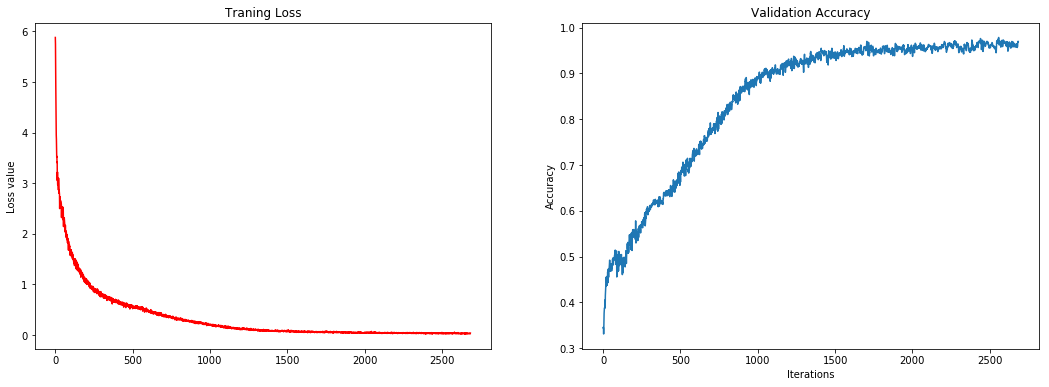

In [18]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import time

def get_accuracy(target, logits):
    """
    Calculate accuracy
    """
    max_seq = max(target.shape[1], logits.shape[1])
    if max_seq - target.shape[1]:
        target = np.pad(
            target,
            [(0,0),(0,max_seq - target.shape[1])],
            'constant')
    if max_seq - logits.shape[1]:
        logits = np.pad(
            logits,
            [(0,0),(0,max_seq - logits.shape[1]), (0,0)],
            'constant')

    return np.mean(np.equal(target, np.argmax(logits, 2)))

train_source = source_int_text[batch_size:]
train_target = target_int_text[batch_size:]

valid_source = helper.pad_sentence_batch(source_int_text[:batch_size])
valid_target = helper.pad_sentence_batch(target_int_text[:batch_size])

with tf.Session(graph=train_graph) as sess:
    sess.run(tf.global_variables_initializer())
    
    loss_list = []
    valid_acc_list = []
    for epoch_i in range(epochs):
        for batch_i, (source_batch, target_batch) in enumerate(
                helper.batch_data(train_source, train_target, batch_size)):
            start_time = time.time()
            
            _, loss = sess.run(
                [train_op, cost],
                {input_data: source_batch,
                 targets: target_batch,
                 lr: learning_rate,
                 sequence_length: target_batch.shape[1],
                 keep_prob: keep_probability})
            
            batch_train_logits = sess.run(
                inference_logits,
                {input_data: source_batch, keep_prob: 1.0})
            batch_valid_logits = sess.run(
                inference_logits,
                {input_data: valid_source, keep_prob: 1.0})
                
            train_acc = get_accuracy(target_batch, batch_train_logits)
            valid_acc = get_accuracy(np.array(valid_target), batch_valid_logits)
            end_time = time.time()
            
            loss_list.append(loss)
            valid_acc_list.append(valid_acc)
            print('Epoch {:>3} Batch {:>4}/{} - Train Accuracy: {:>6.3f}, Validation Accuracy: {:>6.3f}, Loss: {:>6.3f}'
                  .format(epoch_i, batch_i, len(source_int_text) // batch_size, train_acc, valid_acc, loss))

    # Save Model
    saver = tf.train.Saver()
    saver.save(sess, save_path)
    print('Model Trained and Saved')
   
    # Visualize the loss and accuracy
    import matplotlib.pyplot as plt
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
    ax1.plot(loss_list, color='red')
    ax1.set_title('Traning Loss')

    ax1.set_ylabel('Loss value')
    ax2.plot(valid_acc_list)
    ax2.set_xlabel('Iterations')
    ax2.set_ylabel('Accuracy')
    ax2.set_title('Validation Accuracy')
    plt.show()

In [26]:
np.average(valid_acc_list[2200:])

9.367172956466675

### Save Parameters
Save the `batch_size` and `save_path` parameters for inference.

In [27]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
# Save parameters for checkpoint
helper.save_params(save_path)

# Checkpoint

In [28]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import tensorflow as tf
import numpy as np
import helper
import problem_unittests as tests

_, (source_vocab_to_int, target_vocab_to_int), (source_int_to_vocab, target_int_to_vocab) = helper.load_preprocess()
load_path = helper.load_params()

## Sentence to Sequence
To feed a sentence into the model for translation, you first need to preprocess it.  Implement the function `sentence_to_seq()` to preprocess new sentences.

- Convert the sentence to lowercase
- Convert words into ids using `vocab_to_int`
 - Convert words not in the vocabulary, to the `<UNK>` word id.

In [29]:
def sentence_to_seq(sentence, vocab_to_int):
    """
    Convert a sentence to a sequence of ids
    :param sentence: String
    :param vocab_to_int: Dictionary to go from the words to an id
    :return: List of word ids
    """
    # Implement Function
#     ids_sentence=[]
#     for word in sentence.split():
#         if word not in vocab_to_int:
#             ids_sentence.append(vocab_to_int['<UNK>'])
#         else:
#             ids_sentence.append(vocab_to_int[word.lower()])
    
#     return ids_sentence

    return [vocab_to_int.get(word.lower(), vocab_to_int['<UNK>']) for word in sentence.split()]

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_sentence_to_seq(sentence_to_seq)

Tests Passed


## Translate
This will translate `translate_sentence` from English to French.

In [31]:
#translate_sentence = 'he saw a old yellow truck .'
translate_sentence = 'He think she is beautiful.'

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
translate_sentence = sentence_to_seq(translate_sentence, source_vocab_to_int)

loaded_graph = tf.Graph()
with tf.Session(graph=loaded_graph) as sess:
    # Load saved model
    loader = tf.train.import_meta_graph(load_path + '.meta')
    loader.restore(sess, load_path)

    input_data = loaded_graph.get_tensor_by_name('input:0')
    logits = loaded_graph.get_tensor_by_name('logits:0')
    keep_prob = loaded_graph.get_tensor_by_name('keep_prob:0')

    translate_logits = sess.run(logits, {input_data: [translate_sentence], keep_prob: 1.0})[0]

print('Input')
print('  Word Ids:      {}'.format([i for i in translate_sentence]))
print('  English Words: {}'.format([source_int_to_vocab[i] for i in translate_sentence]))

print('\nPrediction')
print('  Word Ids:      {}'.format([i for i in np.argmax(translate_logits, 1)]))
print('  French Words: {}'.format([target_int_to_vocab[i] for i in np.argmax(translate_logits, 1)]))

Input
  Word Ids:      [206, 172, 93, 98, 2]
  English Words: ['he', 'think', 'she', 'is', '<UNK>']

Prediction
  Word Ids:      [83, 220, 182, 14, 159, 99, 140, 54, 251, 1]
  French Words: ['nos', 'fruits', 'est', 'la', 'banane', ',', 'mais', 'mon', 'préféré.', '<EOS>']


## Imperfect Translation
You might notice that some sentences translate better than others.  Since the dataset you're using only has a vocabulary of 227 English words of the thousands that you use, you're only going to see good results using these words.  For this project, you don't need a perfect translation. However, if you want to create a better translation model, you'll need better data.

You can train on the [WMT10 French-English corpus](http://www.statmt.org/wmt10/training-giga-fren.tar).  This dataset has more vocabulary and richer in topics discussed.  However, this will take you days to train, so make sure you've a GPU and the neural network is performing well on dataset we provided.  Just make sure you play with the WMT10 corpus after you've submitted this project.
## Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_language_translation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.